In [1]:
%pip install --quiet --upgrade pip
%pip install pandas matplotlib seaborn scikit-learn numpy==1.23.5
%pip install scikit-learn xgboost shap

Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   -------------------- ------------------- 7.3/14.6 MB 41.4 MB/s eta 0:00:01
   ---------------------------------------- 14.6/14.6 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.2 requires numpy<2.3,>=1.24, but you have numpy 1.23.5 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------------------------ --------------- 7.9/12.9 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 42.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_test.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


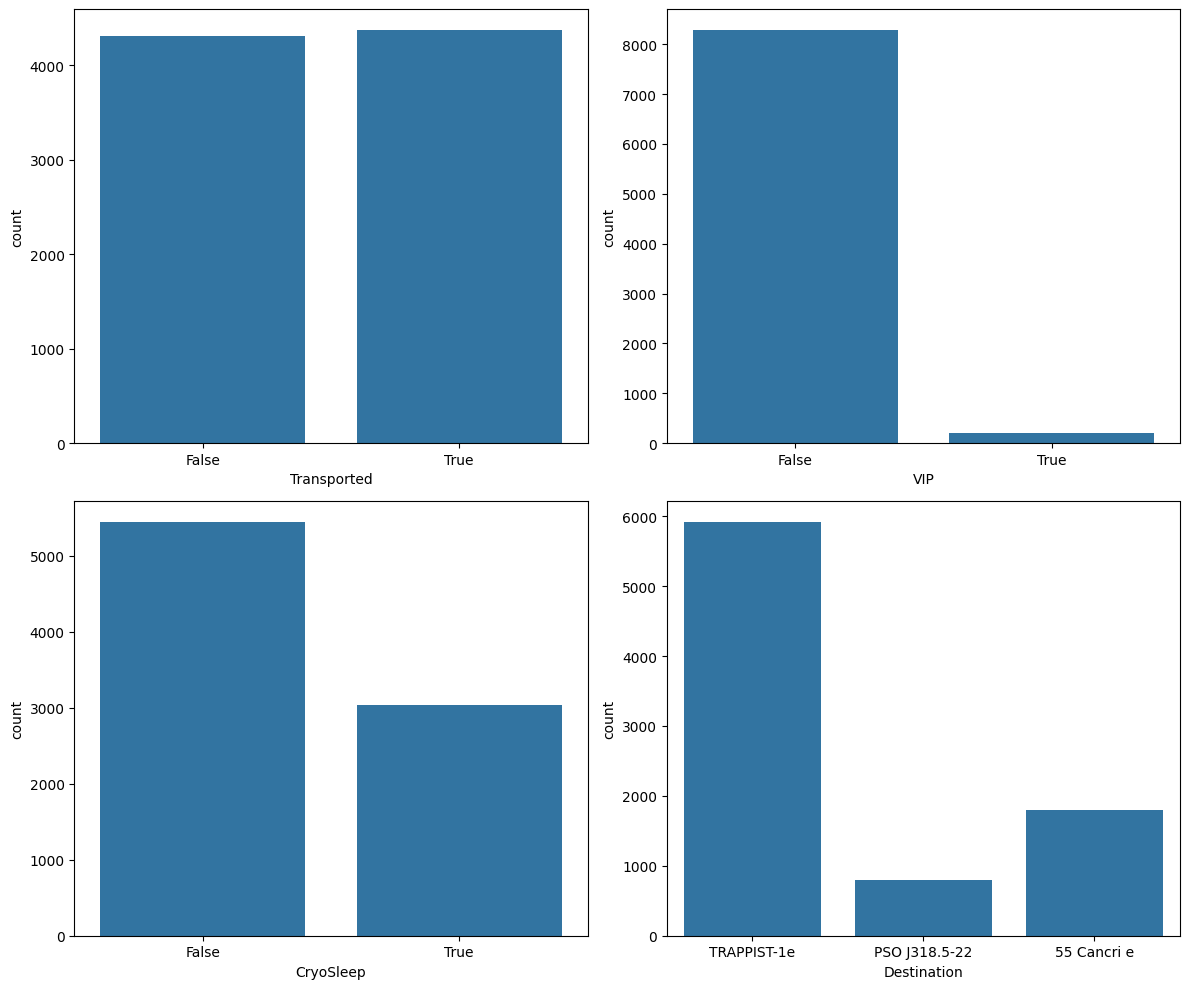

In [7]:
# Make grid of countplots of the 'Transported', "VIP", "CryoSleep" and "RoomService" columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(data=df_train, x='Transported', ax=axes[0, 0])
sns.countplot(data=df_train, x='VIP', ax=axes[0, 1])
sns.countplot(data=df_train, x='CryoSleep', ax=axes[1, 0])
sns.countplot(data=df_train, x='Destination', ax=axes[1, 1])
plt.tight_layout()
plt.show()

e:\Kaggle\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
e:\Kaggle\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
e:\Kaggle\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
e:\Kaggle\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
e:\Kaggle\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


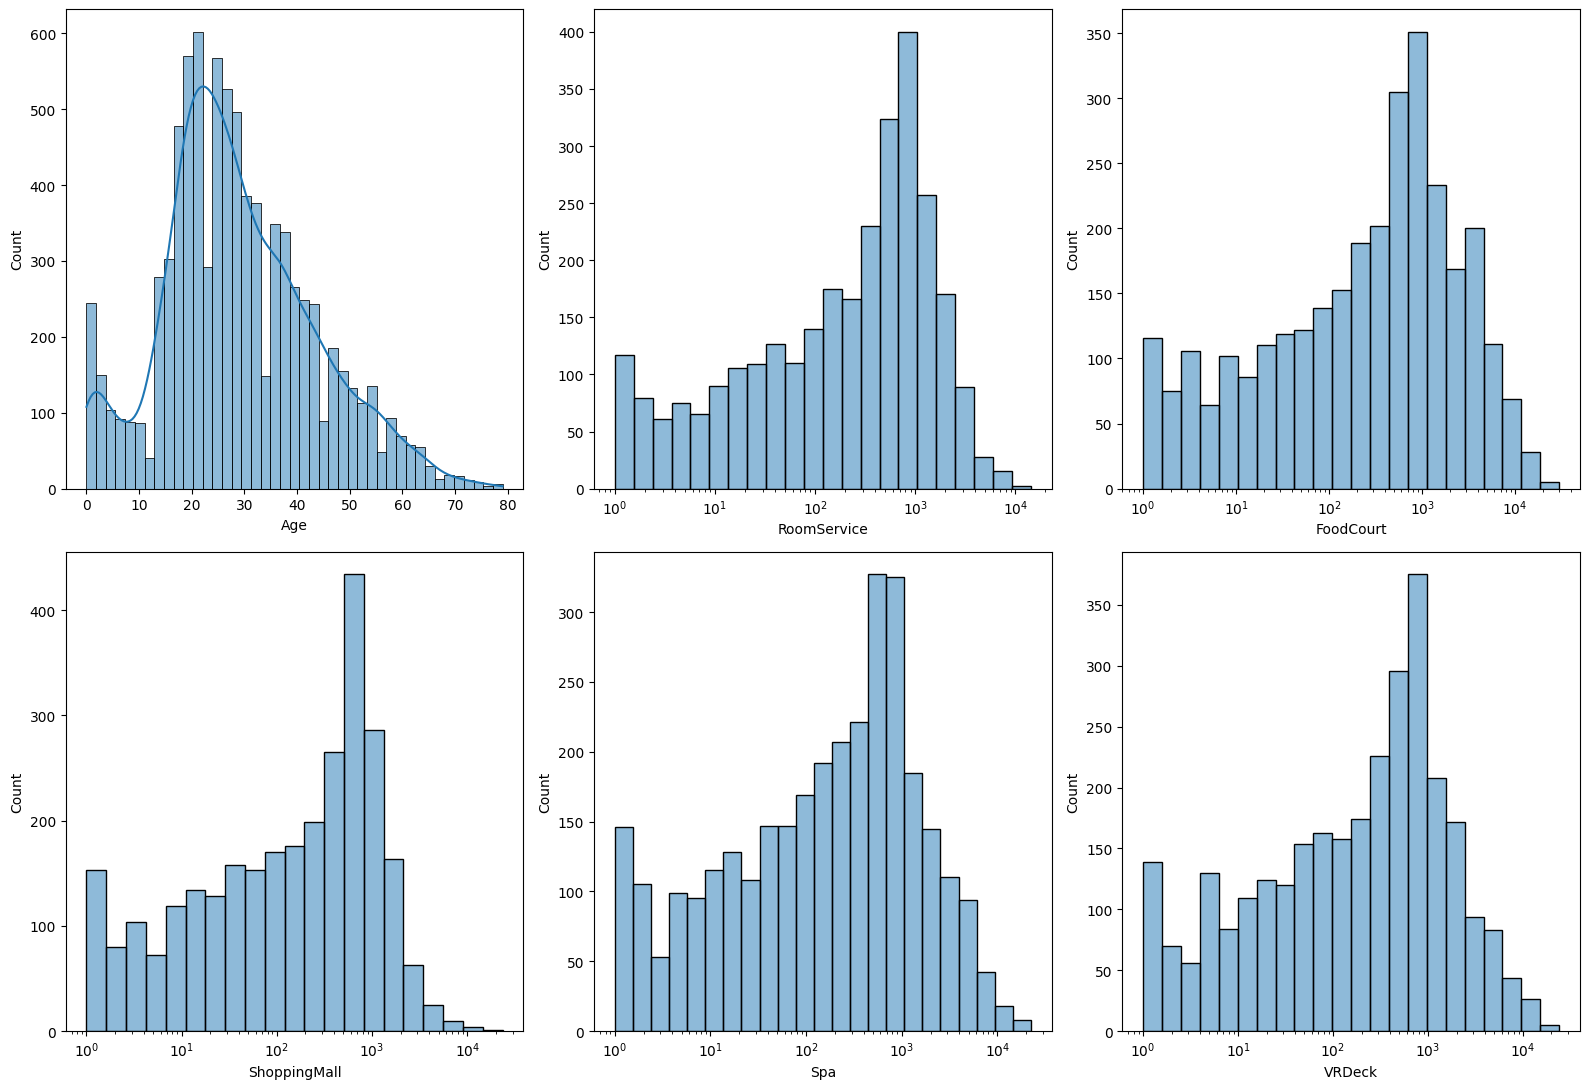

In [8]:
# Make a grid of distribution plots for the 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' and 'VRDeck' columns
fig, axes = plt.subplots(2, 3, figsize=(16, 11))
sns.histplot(data=df_train, x='Age', kde=True, ax=axes[0, 0])
sns.histplot(data=df_train, x='RoomService', kde=True, ax=axes[0, 1], log_scale=True)
sns.histplot(data=df_train, x='FoodCourt', kde=True, ax=axes[0, 2], log_scale=True)
sns.histplot(data=df_train, x='ShoppingMall', kde=True, ax=axes[1, 0], log_scale=True)
sns.histplot(data=df_train, x='Spa', kde=True, ax=axes[1, 1], log_scale=True)
sns.histplot(data=df_train, x='VRDeck', kde=True, ax=axes[1, 2], log_scale=True)
plt.tight_layout()
plt.show()

In [9]:
df_train[['CabinDeck', 'CabinNum', 'CabinSide']] = df_train['Cabin'].str.split('/', expand=True)
df_test[['CabinDeck', 'CabinNum', 'CabinSide']] = df_test['Cabin'].str.split('/', expand=True)

In [10]:
# One-hot encode the 'HomePlanet', 'CryoSleep', 'Destination', 'VIP' and 'CabinDeck', 'CabinNum', 'CabinSide' columns
df_train = pd.get_dummies(df_train, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], drop_first=True)

In [11]:
# CabinDeck: Label Encoding (o One-Hot si son pocas)
from sklearn.preprocessing import LabelEncoder
deck_encoder = LabelEncoder()
df_train['CabinDeck'] = deck_encoder.fit_transform(df_train['CabinDeck'].fillna('Unknown'))

# CabinSide: binaria
df_train['CabinSide'] = df_train['CabinSide'].map({'P': 0, 'S': 1})
df_train['CabinSide'] = df_train['CabinSide'].fillna(-1)  # si quieres mantener missing como valor especial

# CabinNum: convertir a número y escalar
df_train['CabinNum'] = pd.to_numeric(df_train['CabinNum'], errors='coerce')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train['CabinNum_scaled'] = scaler.fit_transform(df_train[['CabinNum']])

# Drop the Cabin column as it is no longer needed
df_train.drop(columns=['Cabin'], inplace=True)

df_train['VIP'] = df_train['VIP_True'].astype(int)
df_train.drop(columns=['VIP_True'], inplace=True)

# get the transported column as a binary variable and drop it from the train set and add it at the end of the train set
y = df_train['Transported'].astype(int)
df_train.drop(columns=['Transported'], inplace=True)
# Add the target variable to the end of the train set
df_train['Transported'] = y

In [12]:
# CabinDeck: Label Encoding (o One-Hot si son pocas)
from sklearn.preprocessing import LabelEncoder
deck_encoder = LabelEncoder()
df_test['CabinDeck'] = deck_encoder.fit_transform(df_test['CabinDeck'].fillna('Unknown'))

# CabinSide: binaria
df_test['CabinSide'] = df_test['CabinSide'].map({'P': 0, 'S': 1})
df_test['CabinSide'] = df_test['CabinSide'].fillna(-1)  # si quieres mantener missing como valor especial

# CabinNum: convertir a número y escalar
df_test['CabinNum'] = pd.to_numeric(df_test['CabinNum'], errors='coerce')

# Drop the Cabin column as it is no longer needed
df_test.drop(columns=['Cabin'], inplace=True)

df_test['VIP'] = df_test['VIP_True'].astype(int)
df_test.drop(columns=['VIP_True'], inplace=True)

In [13]:
df_train.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinNum_scaled,VIP,Transported
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0.0,0.0,True,False,False,False,True,-1.172966,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,5,0.0,1.0,False,False,False,False,True,-1.172966,0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0.0,1.0,True,False,False,False,True,-1.172966,1,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0.0,1.0,True,False,False,False,True,-1.172966,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,5,1.0,1.0,False,False,False,False,True,-1.171013,0,1


In [14]:
df_train.to_csv('../data/train_processed.csv', index=False)
df_test.to_csv('../data/test_processed.csv', index=False)

In [15]:
df_train['Transported'].value_counts(normalize=True)

Transported
1    0.503624
0    0.496376
Name: proportion, dtype: float64

In [16]:
# 1.1- Pasar bool→int para modelos tradicionales
bool_cols = df_train.select_dtypes('bool').columns
df_train[bool_cols] = df_train[bool_cols].astype(int)
df_test[bool_cols]  = df_test[bool_cols].astype(int)

# 1.2- Imputar nulos (ejemplo rápido)
num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','CabinNum_scaled']
df_train[num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())
df_test[num_cols]  = df_test[num_cols].fillna(df_test[num_cols].median())


KeyError: "['CabinNum_scaled'] not in index"

Text(0.5, 1.0, 'Distribución del target')

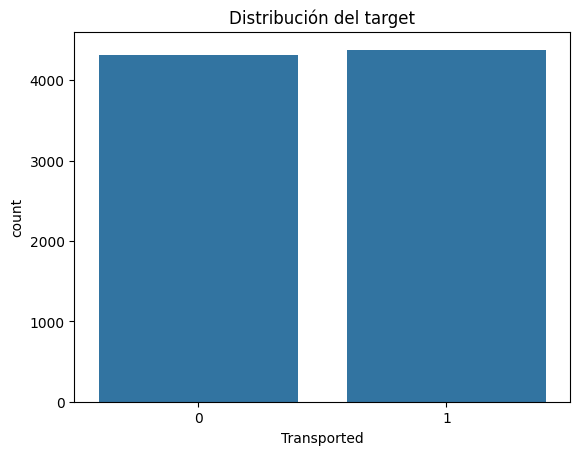

In [ ]:
sns.countplot(x='Transported', data=df_train)
plt.title('Distribución del target')

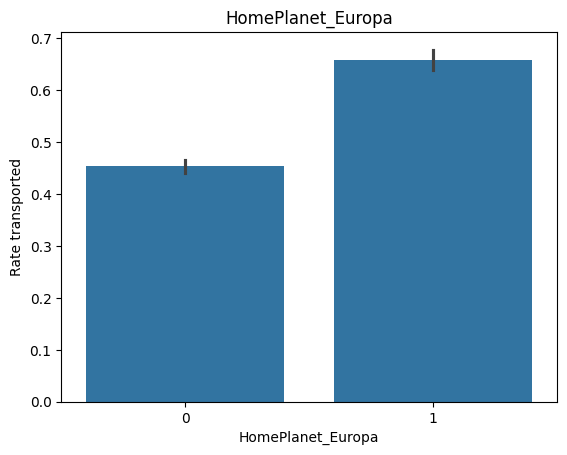

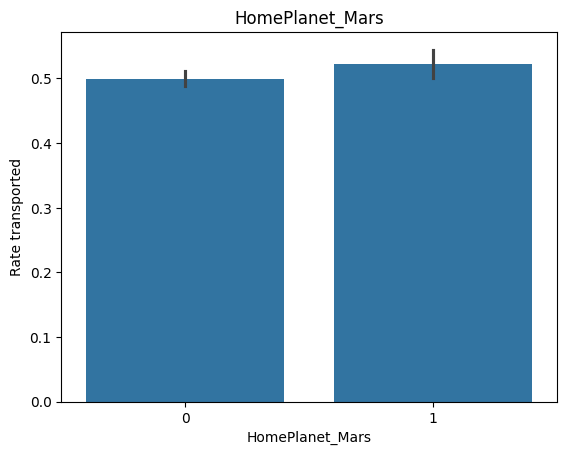

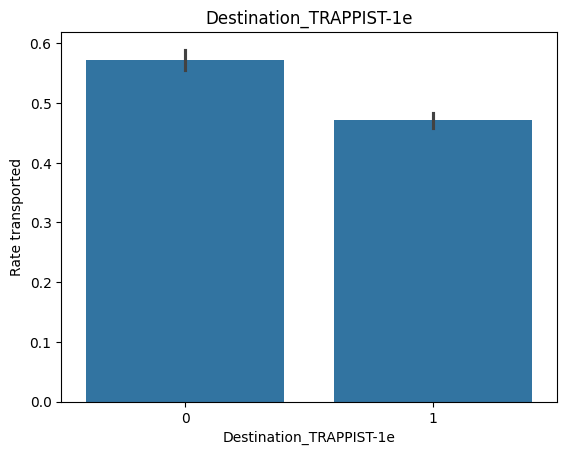

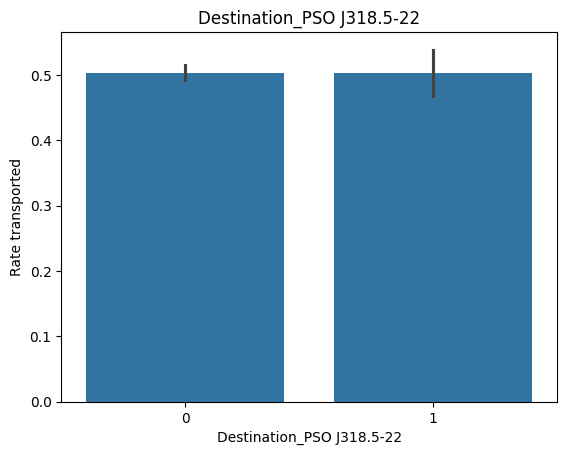

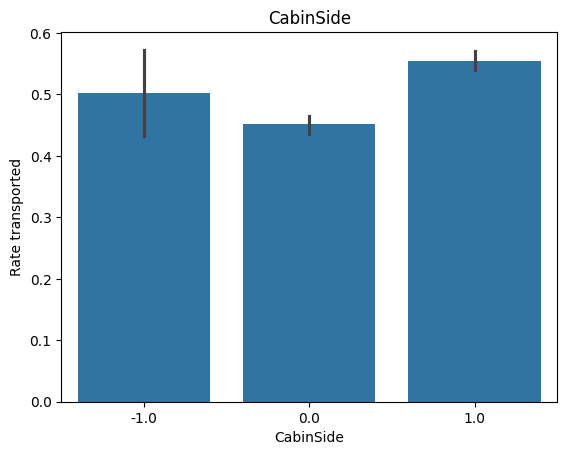

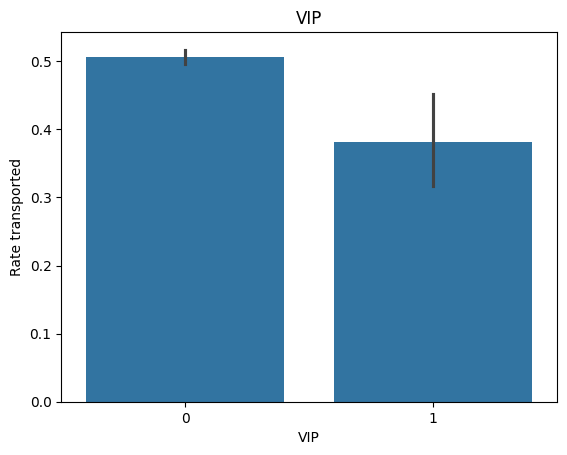

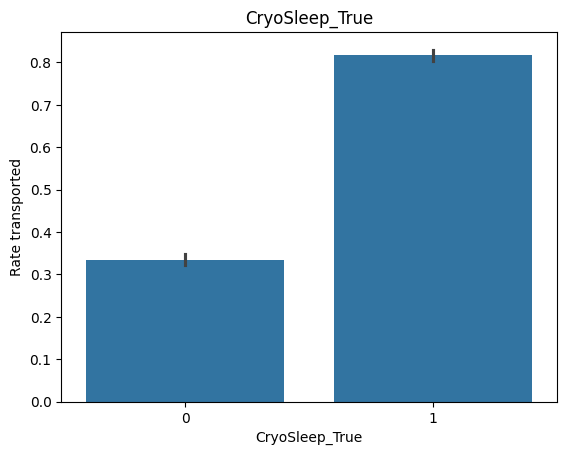

In [ ]:
cat_cols = ['HomePlanet_Europa','HomePlanet_Mars',
            'Destination_TRAPPIST-1e','Destination_PSO J318.5-22',
            'CabinDeck','CabinSide','VIP','CryoSleep_True']
for col in cat_cols:
    if df_train[col].nunique()<=8:
        sns.barplot(x=col, y='Transported', data=df_train, estimator=lambda x: sum(x)/len(x))
        plt.ylabel('Rate transported'); plt.title(col); plt.show()


In [ ]:
df_train['Group'] = df_train['PassengerId'].str.split('_').str[1]
df_train['TotalSpent'] = df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
df_train['HasSpent']  = (df_train['TotalSpent']>0).astype(int)

In [ ]:
df_train.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,...,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinNum_scaled,VIP,Transported,Group,TotalSpent,HasSpent
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0.0,...,0,0,0,1,-1.172966,0,0,01,0.0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,5,0.0,...,0,0,0,1,-1.172966,0,1,01,736.0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0.0,...,0,0,0,1,-1.172966,1,0,01,10383.0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0.0,...,0,0,0,1,-1.172966,0,0,02,5176.0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,5,1.0,...,0,0,0,1,-1.171013,0,1,01,1091.0,1


In [ ]:
# get the transported column as a binary variable and drop it from the train set and add it at the end of the train set
y = df_train['Transported'].astype(int)
df_train.drop(columns=['Transported'], inplace=True)
# Add the target variable to the end of the train set
df_train['Transported'] = y

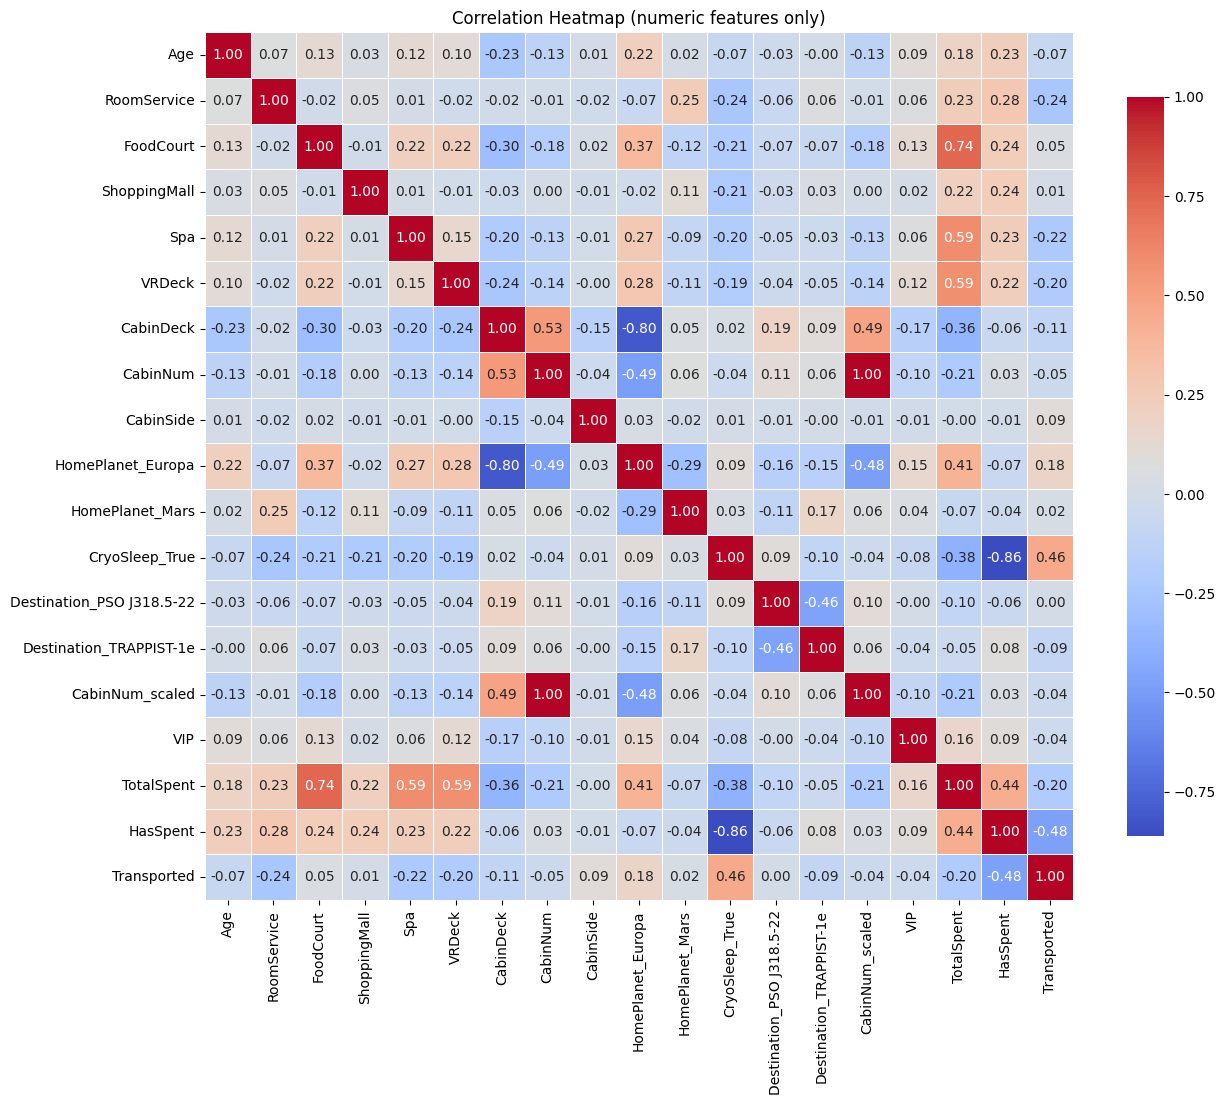

In [ ]:
num_cols = df_train.select_dtypes(include=['number', 'bool']).columns        # bool → 0/1

corr = df_train[num_cols].corr(method='pearson')

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=.5,
    square=True,
    cbar_kws={'shrink': .8}
)

plt.title('Correlation Heatmap (numeric features only)')
plt.show()


In [ ]:
df_train.to_csv('../data/train_final.csv', index=False)
df_test.to_csv('../data/test_final.csv', index=False)